In [0]:
#MNSITの読込と前処理
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np

#MNSITをダウンロード
(x_train, t_train), (x_test, t_test) = mnist.load_data()

#クラス数
classes = 10

#データを変形
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

#データ型を変換
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

#画素値データを0.0～1.0の範囲に正規化
x_train /= 255
x_test /= 255

#正解ラベルをone-hot表現に変換
t_train = np_utils.to_categorical(t_train, classes)
t_test = np_utils.to_categorical(t_test, classes)


In [10]:
#CNNの構成
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam

#Sequentialをインスタンス化
model = Sequential()

#畳み込み層・プーリング層の設定
model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", input_shape=(28,28,1), activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#ドロップアウト層
model.add(Dropout(0.5))

#形状を変形
model.add(Flatten())

#全結合層の設定
model.add(Dense(128, activation="relu"))

#出力層の設定
model.add(Dense(classes, activation="softmax"))

#損失関数は交差エントロピー誤差を指定、最適化手法はAdamを指定、性能評価は正解率を指定
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

#構築したニューラルネットワークの概要を表示
model.summary()

#学習を行って結果を出力
history = model.fit(x_train, t_train, epochs=10, batch_size=100, verbose=1, validation_data=(x_test, t_test))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
___________________________

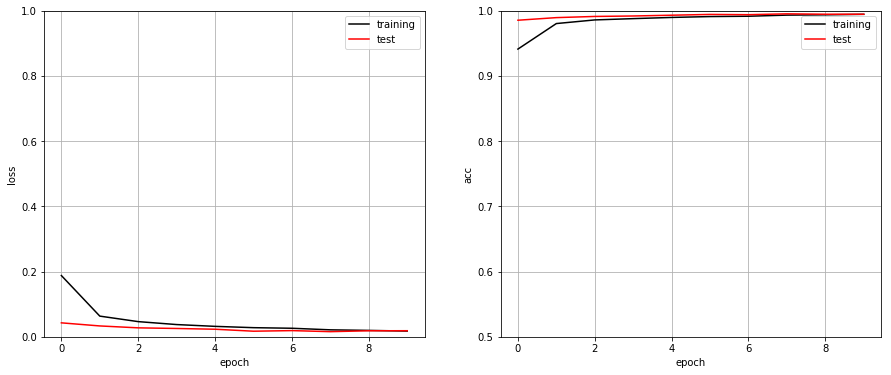

In [11]:
#グラフで結果を出力
%matplotlib inline
import matplotlib.pyplot as plt

#プロット図のサイズを指定
plt.figure(figsize=(15, 6))

#プロット図を縮小して図の間のスペースを空ける
plt.subplots_adjust(wspace=0.2)

#1×2のグリッドの左(1,2,1)の領域にプロット
plt.subplot(1,2,1)

#誤差の推移をプロット
plt.plot(history.history["loss"], label="training", color="black")
plt.plot(history.history["val_loss"], label="test", color="red")

plt.ylim(0,1) #y軸の範囲
plt.legend()  #凡例を表示
plt.grid()    #グリッドを表示

plt.xlabel("epoch") #x軸のラベル
plt.ylabel("loss")  #y軸のラベル


#1×2のグリッドの左(1,2,2)の領域にプロット
plt.subplot(1,2,2)

#正解率の推移をプロット
plt.plot(history.history["acc"], label="training", color="black")
plt.plot(history.history["val_acc"], label="test", color="red")

plt.ylim(0.5,1) #y軸の範囲
plt.legend()  #凡例を表示
plt.grid()    #グリッドを表示

plt.xlabel("epoch") #x軸のラベル
plt.ylabel("acc")  #y軸のラベル

plt.show()